**Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

**Read in the SIMD_2014 csv file as a DataFrame called SIMD2014

In [4]:
SIMD2014 = pd.read_csv('SIMD_2014.csv')

**Check the head of SIMD2014, plus the info() and describe() methods

In [5]:
SIMD2014.head()

,http://purl.org/linked-data/sdmx/2009/dimension#refArea,Reference Area,Access To Services,Education Skills And Training,Employment,Health,Housing,Income,SIMD
0,http://statistics.gov.scot/id/statistical-geog...,Abbey Parks & Brucefield North West,5232,5466,3370,2849,3038,3778,4145
1,http://statistics.gov.scot/id/statistical-geog...,Abbeyview Central,2424,1248,1842,2611,1597,1014,1448
2,http://statistics.gov.scot/id/statistical-geog...,Abbeyview East,1538,669,870,967,632,882,692
3,http://statistics.gov.scot/id/statistical-geog...,Abbeyview Linburn,1361,2815,3555,4254,3296,4872,3864
4,http://statistics.gov.scot/id/statistical-geog...,Abbeyview North,1927,417,649,1611,1193,643,617


In [6]:
SIMD2014.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6505 entries, 0 to 6504
Data columns (total 9 columns):
http://purl.org/linked-data/sdmx/2009/dimension#refArea    6505 non-null object
Reference Area                                             6505 non-null object
Access To Services                                         6505 non-null int64
Education Skills And Training                              6505 non-null int64
Employment                                                 6505 non-null int64
Health                                                     6505 non-null int64
Housing                                                    6505 non-null int64
Income                                                     6505 non-null int64
SIMD                                                       6505 non-null int64
dtypes: int64(7), object(2)
memory usage: 457.5+ KB


In [7]:
SIMD2014.describe()

,Access To Services,Education Skills And Training,Employment,Health,Housing,Income,SIMD
count,6505.000000,6505.000000,6505.000000,6505.000000,6505.000000,6505.000000,6505.000000
mean,3253.000000,3253.000000,3253.089316,3253.000000,3253.028593,3253.045503,3253.000000
std,1877.976083,1877.976083,1877.998871,1877.976083,1877.983258,1877.990938,1877.976083
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
50%,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000,3253.000000
75%,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000,4879.000000
max,6505.000000,6505.000000,6505.000000,6505.000000,6505.000000,6504.000000,6505.000000


**Use pairplot to explore relationships across the entire data set

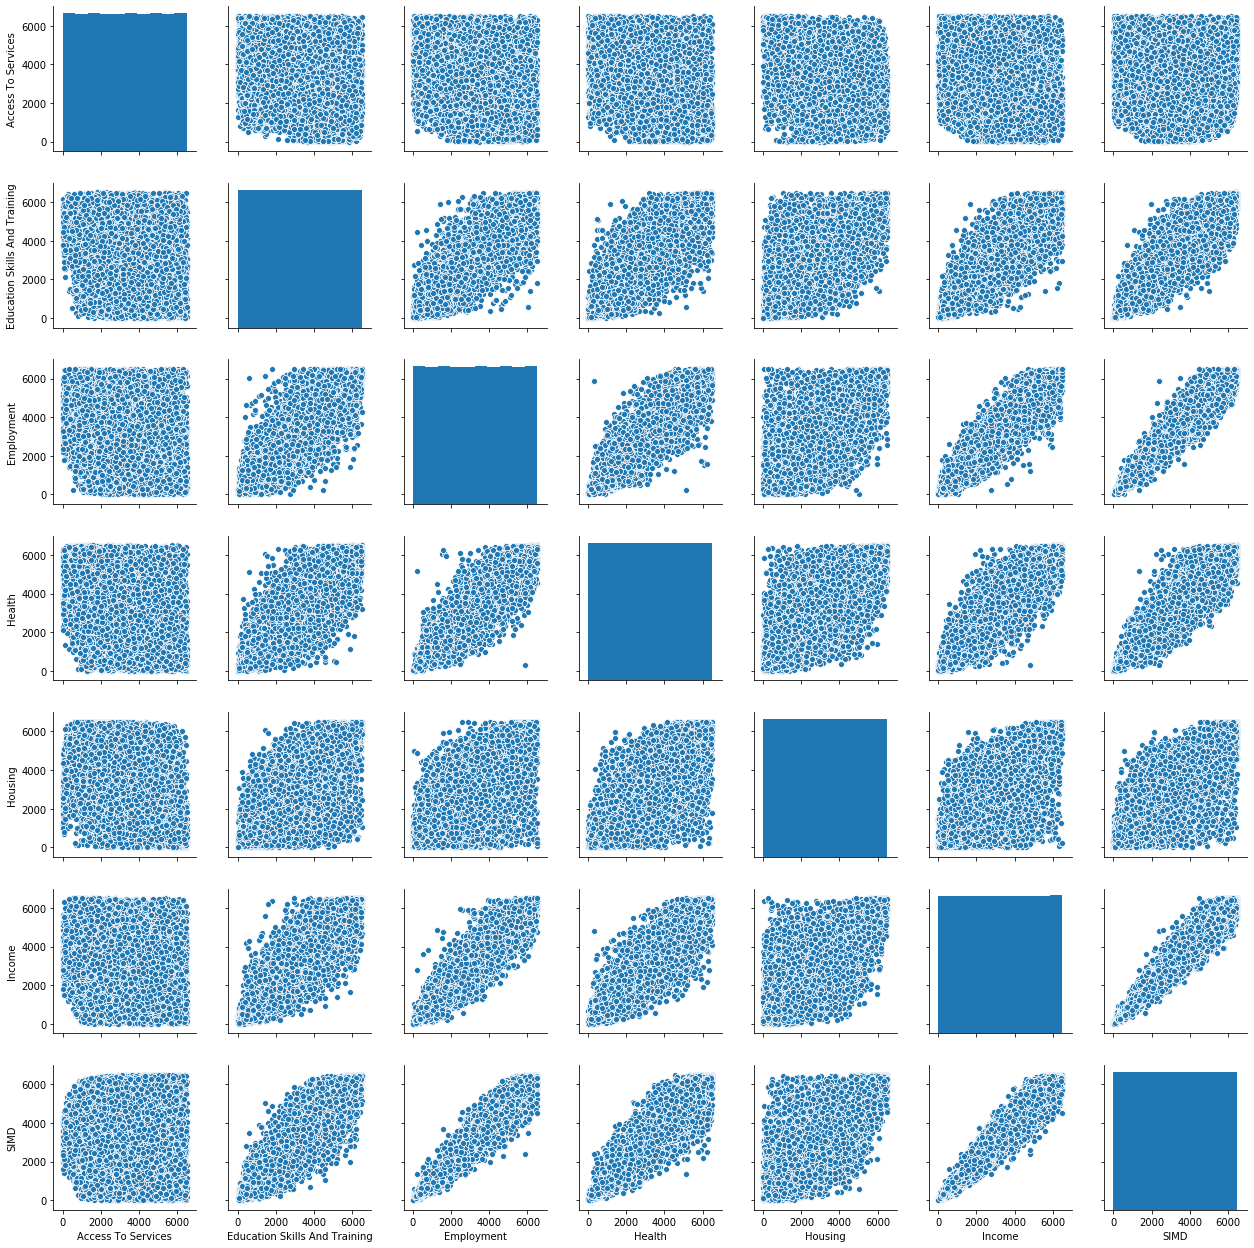

In [8]:
sns.pairplot(SIMD2014)

**Use seaborn to create a scatterplot to compare the SIMD and Income columns

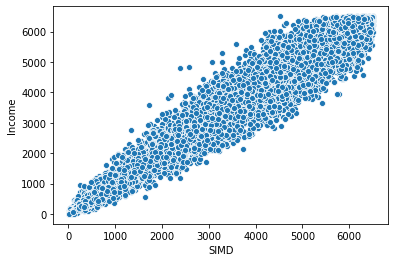

In [10]:
sns.scatterplot(data=SIMD2014, x='SIMD', y='Income')

**Use seaborn to create a jointplot to compare the SIMD and Employment columns

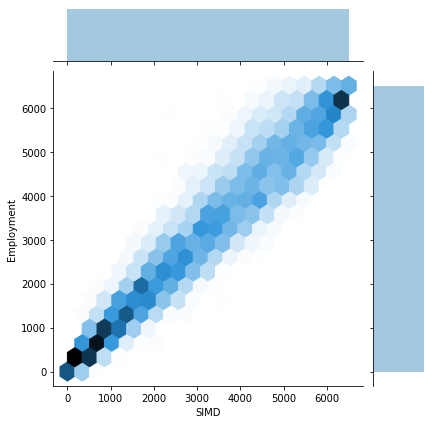

In [13]:
sns.jointplot(data=SIMD2014, x='SIMD', y='Employment',kind='hex')

**Use seaborn to create a heatmap to compare all dataset columns

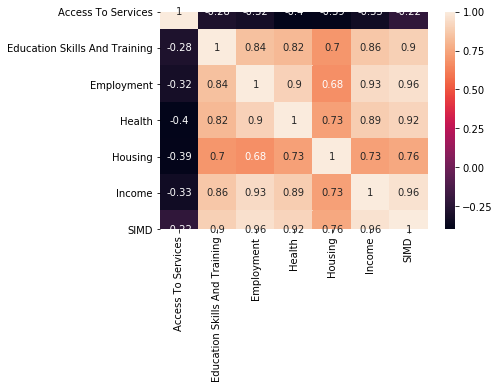

In [15]:
sns.heatmap(SIMD2014.corr(),annot=True)

**Create a linear model plot SIMD vs. Income

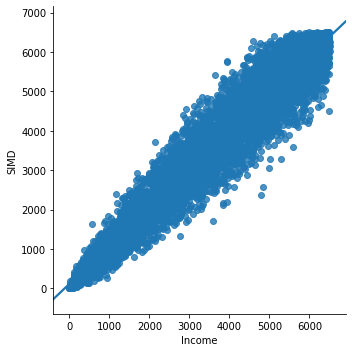

In [17]:
sns.lmplot(x='Income',y='SIMD',data=SIMD2014)

**Get column information for dataset

In [19]:
SIMD2014.columns

Index(['http://purl.org/linked-data/sdmx/2009/dimension#refArea',
       'Reference Area', 'Access To Services', 'Education Skills And Training',
       'Employment', 'Health', 'Housing', 'Income', 'SIMD'],
      dtype='object')

**Set X variable equal to all SIMD sub categories

In [20]:
X = SIMD2014[['Access To Services', 'Education Skills And Training',
       'Employment', 'Health', 'Housing', 'Income']]

**Set Y variable equal to SIMD value

In [21]:
Y = SIMD2014['SIMD']

**Use train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

**Import LinearRegression from sklearn.linear_model and create linear regression instance called lm

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

**Train lm on the training data created previously

In [26]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Print intercept and coefficients of the model

In [27]:
print(lm.intercept_)

-841.2950685093551


In [28]:
lm.coef_

array([0.1525401 , 0.14089881, 0.33373228, 0.14983915, 0.1151696 ,
       0.36576652])

**Create dataframe for coef results for evaluation

In [29]:
X_train.columns

Index(['Access To Services', 'Education Skills And Training', 'Employment',
       'Health', 'Housing', 'Income'],
      dtype='object')

In [30]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [31]:
cdf

,Coeff
Access To Services,0.152540
Education Skills And Training,0.140899
Employment,0.333732
Health,0.149839
Housing,0.115170
Income,0.365767


Remember and do reading on coefficients and add to report.

**Use lm.predict() to predict off the X_test set of the data.

In [32]:
predictions = lm.predict(X_test)

In [33]:
predictions

array([ 516.2309567 , 1594.82959746, 5333.35675437, ..., 2021.67718016,
       6073.61136821, 3510.0837294 ])

**Create a scatterplot of the real test values versus the predicted values

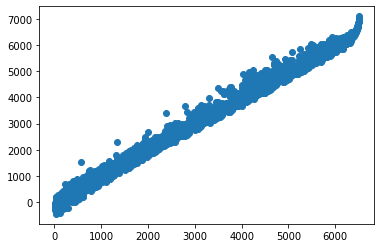

In [34]:
plt.scatter(y_test,predictions)

**Check residuals (difference between test and actuals) if model is normally distributed then model a good fit

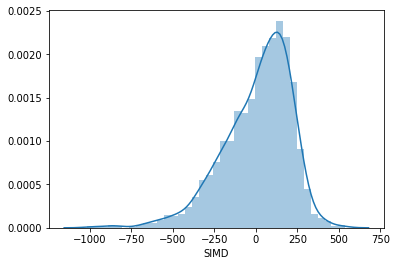

In [35]:
sns.distplot((y_test-predictions))

**Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error

In [36]:
from sklearn import metrics

In [37]:
print('MAE', metrics.mean_absolute_error(y_test,predictions))
print('MSE', metrics.mean_squared_error(y_test,predictions))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,predictions)))
print('Explained', metrics.explained_variance_score(y_test,predictions))

MAE 163.65852242298027
MSE 43149.77552730686
RMSE 207.72524046756297
Explained 0.9877088386956315
